# 2-22: Intro to scikit-learn

<img src="https://www.cityofberkeley.info/uploadedImages/Public_Works/Level_3_-_Transportation/DSC_0637.JPG" style="width: 500px; height: 275px;" />
---

** Regression** is useful for predicting a value that varies on a continuous scale from a bunch of features. This lab will introduce the regression methods available in the scikit-learn extension to scipy, focusing on ordinary least squares linear regression, LASSO, and Ridge regression.

*Estimated Time: 45 minutes*

---


### Table of Contents


1 - [The Test-Train Split](#section 1)<br>

2 - [Linear Regression](#section 2)<br>

3 - [LASSO Regression](#section 3)<br>

3 - [Ridge Regression](#section 4)<br>



**Dependencies:**

In [1]:
import numpy as np
from datascience import *
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression

## The Data: Bike Sharing

In your time at Cal, you've probably passed by one of the many bike sharing station around campus. Bike sharing systems have become more and more popular as traffic and concerns about global warming rise. This lab's data describes one such bike sharing system in Washington D.C., from [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

In [2]:
bike=Table().read_table(('data/Bike-Sharing-Dataset/day.csv'))

# reformat the date column to integers representing the day of the year, 001-366
bike['dteday'] = pd.to_datetime(bike['dteday']).strftime('%j')

# get rid of the index column
bike = bike.drop(0)

bike.show(4)

dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
001,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
002,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
003,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
004,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,108,1454,1562


Take a moment to get familiar with the data set. In data science, you'll often hear rows referred to as **records** and columns as **features**. Before you continue, make sure you can answer the following:

- How many records are in this data set?
- What does each record represent?
- What are the different features?
- How is each feature represented? What values does it take, and what are the data types of each value?

Use Table methods and check the UC Irvine link for more information.

In [3]:
# explore the data set here

---
## 1. The Test-Train Split  <a id='section 1'></a>

When we train a model on a data set, we run the risk of [**over-fitting**](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html). Over-fitting happens when a model becomes so complex that it makes very accurate predictions for the data it was trained on, but it can't generalize to make good predictions on new data.

We can reduce the risk of overfitting by using a **test-train split**. 

1. Randomly divide our data set into two smaller sets: one for training and one for testing
2. Train the data on the training set, changing our model along the way to increase accuracy
3. Test the data's predictions using the test set.

Scikit-learn's [`test_train_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function will help here. First, separate your data into two parts: a Table containing the features used to make our prediction, and an array of the true values. To start, let's predict the total number of riders using every feature that isn't a rider count.

Note: for the function to work, X can't be a Table. Save X as a pandas DataFrame by calling `.to_df()` on the feature Table.

In [4]:
# the features used to predict riders
X = bike.drop('casual', 'registered', 'cnt')
X = X.to_df()

# the number of riders
y = bike['cnt']

Next, set the random seed using `np.random.seed(...)`. Any seed number is fine- the important thing is to document the number you used in case we need to recreate this pseudorandom split in the future.

Then, call `train_test_split` on your X and y. Also set the parameters `train_size=` and `test_size=` to set aside 75% of the data for training and 25% for testing.

In [5]:
# set the random seed

np.random.seed(10)

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)

## 2. Linear Regression (Ordinary Least Squares) <a id='section 2'></a>

Now, we're ready to start training models and making predictions. We'll start with a **linear regression** model.

[Scikit-learn's linear regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) is built around scipy's ordinary least squares, which you used in the last lab. The syntax for each scikit-learn model is very similar:
1. Create a model by calling its constructor function. For example, `LinearRegression()` makes a linear regression model.
2. Train the model on your training data by calling `.fit(train_X, train_y)` on the model

Create a linear regression model in the cell below.

In [6]:
# create a model
lin_reg = LinearRegression()

# fit the model
lin_model = lin_reg.fit(X_train, y_train)


With the model fit, you can look at the best-fit slope for each feature using `.coef_`, and you can get the intercept of the regression line with `.intercept_`.

In [7]:
print(lin_model.coef_)
print(lin_model.intercept_)

[   -9.14034264   492.7782076   2069.17533861   238.66483466  -591.80114052
    70.58530536   100.23392506  -620.23539183 -1258.70827744  7446.3202029
  -830.19961738 -2496.88367659]
1042.51133012


Now, let's get a sense of how good our model is. We can do this by looking at the **residuals**: the difference between the predicted values and the actual values, also called the error.

- Call `.predict(X, Y)` on your linear regression model, using your training X and training y, to return a list of predicted number of riders per hour. Save it to a variable `lin_pred`.
- Calculate the residuals by subtracting the predicted riders from the actual riders. Save the results to a variable `lin_error`.
- Plot the residuals on a scatter plot (use `plt.scatter(...)` with `X_train['day_of_yr'`] on the x-axis)

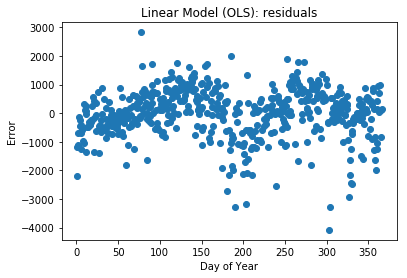

In [8]:
# predict the number of riders
lin_pred = lin_model.predict(X_train)
# calculate residuals
lin_error = y_train - lin_pred

# plot the residuals on a scatter plot
plt.scatter(X_train['dteday'],lin_error)
plt.title('Linear Model (OLS): residuals')
plt.xlabel('Day of Year')
plt.ylabel('Error')
plt.show()

Question: what should our scatter plot look like if our model was 100% accurate?

**ANSWER:** All points (i.e. errors) should be 0.

We can also get a sense of how well our model is doing with `.score(X, y)`, which returns the [**Coefficient of Determination**](https://en.wikipedia.org/wiki/Coefficient_of_determination), also called $R^2$. Generally, scores closer to 1 indicate a better fit, while a score close to 0 indicates nearly no correlation at all.

Print the scores for the train data and the test data. Which one do you expect to be higher, and why?

In [9]:
print(lin_model.score(X_train, y_train))
print(lin_model.score(X_test, y_test))

0.806021100674
0.777649494379


## 3. Ridge Regression <a id='section 3'></a>

Now that you've gone through the process for OLS linear regression, it's easy to do the same for [**Ridge Regression**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). In this case, the constructor function that makes the model is `Ridge()`.

In [10]:
# make and fit a Ridge regression model
ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train, y_train)


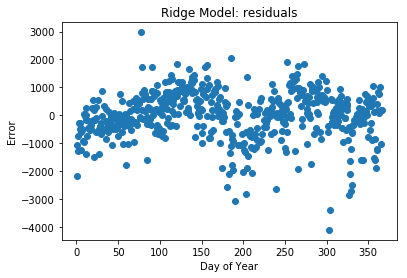

In [11]:
# use the model to make predictions
ridge_pred = ridge_model.predict(X_train)
# calculate the residuals for the training data
ridge_error = y_train - ridge_pred
# plot the residuals
plt.scatter(X_train['dteday'],ridge_error)
plt.title('Ridge Model: residuals')
plt.xlabel('Day of Year')
plt.ylabel('Error')
plt.show()

In [12]:
# score the model for the test and train data
print(ridge_model.score(X_train, y_train)) 
print(ridge_model.score(X_test, y_test)) 

0.804125092745
0.789412851691


Note: the documentation for Ridge regression shows it has lots of **hyperparameters**: values we can choose when the model is made. Now that we've tried it using the defaults, look at the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) and try changing some parameters to see if you can get a higher score (`alpha` might be a good one to try).

## 4. LASSO Regression <a id='section 4'></a>

Finally, we'll try using [LASSO regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html). The constructor function to make the model is `Lasso()`. 

You may get a warning message saying the objective did not converge. The model will still work, but to get convergence try increasing the number of iterations (`max_iter=`) when you construct the model.


In [13]:
# create and fit the model
lasso_reg = Lasso(max_iter=10000)  

lasso_model = lasso_reg.fit(X_train, y_train)


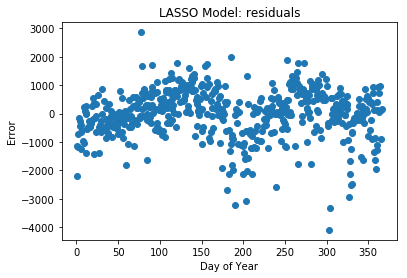

In [14]:
# use the model to make predictions
lasso_pred = lasso_model.predict(X_train)

# calculate the residuals for the training data
lasso_error = y_train - lasso_pred

# plot the residuals
plt.scatter(X_train['dteday'],lasso_error)
plt.title('LASSO Model: residuals')
plt.xlabel('Day of Year')
plt.ylabel('Error')
plt.show()

In [15]:
# score the model for the test and train data
print(lasso_model.score(X_train, y_train)) 
print(lasso_model.score(X_test, y_test)) 

0.805827374856
0.782683364075


Note: LASSO regression also has many tweakable hyperparameters. See how changing them affects the score!

Question: How do these three models compare on performance? What sorts of things could we do to improve performance?

**ANSWER:** All three models have very similar accuracy ($R^2 \approx .8$ for training data and $\approx .78$ for test data).

We could try changing which features we use or adjust the hyperparameters.

Coming up this semester: how to select your models, model parameters, and features to get the best performance.

---
Notebook developed by: Keeley Takimoto

Data Science Modules: http://data.berkeley.edu/education/modules
